<a href="https://colab.research.google.com/github/uyenvybuile1502/homeworkfuzzy/blob/main/bai7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.0 MB/s eta 0:00:00


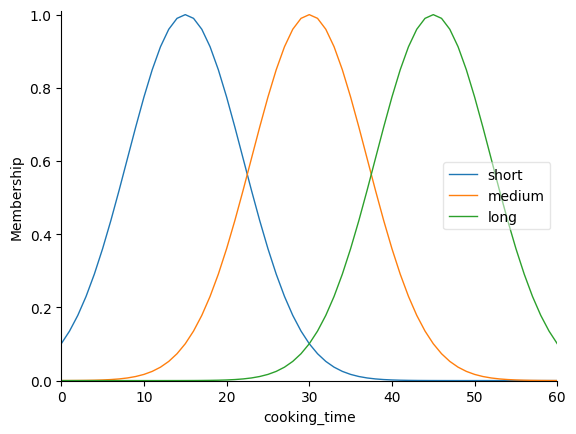

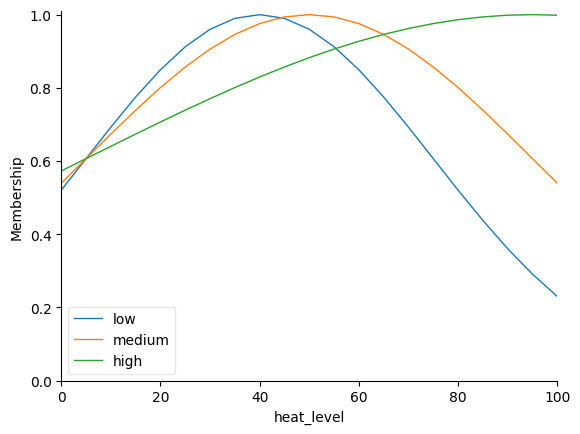

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


food_type = ctrl.Antecedent(np.arange(0, 11, 1), 'food_type')
food_weight = ctrl.Antecedent(np.arange(0, 1001, 10), 'food_weight')
initial_temperature = ctrl.Antecedent(np.arange(0, 101, 5), 'initial_temperature')
water_content = ctrl.Antecedent(np.arange(0, 11, 1), 'water_content')

cooking_time = ctrl.Consequent(np.arange(0, 61, 1), 'cooking_time')
heat_level = ctrl.Consequent(np.arange(0, 101, 5), 'heat_level')

food_type['soft'] = fuzz.gaussmf(food_type.universe, 3, 6)
food_type['medium'] = fuzz.gaussmf(food_type.universe, 5, 6)
food_type['hard'] = fuzz.gaussmf(food_type.universe, 9, 6)

food_weight['light'] = fuzz.gaussmf(food_weight.universe, 200, 150)
food_weight['medium'] = fuzz.gaussmf(food_weight.universe, 500, 150)
food_weight['heavy'] = fuzz.gaussmf(food_weight.universe, 800, 150)

initial_temperature['cold'] = fuzz.gaussmf(initial_temperature.universe, 10, 25)
initial_temperature['warm'] = fuzz.gaussmf(initial_temperature.universe, 40, 25)
initial_temperature['hot'] = fuzz.gaussmf(initial_temperature.universe, 60, 25)

water_content['low'] = fuzz.gaussmf(water_content.universe, 2, 4)
water_content['medium'] = fuzz.gaussmf(water_content.universe, 5, 7)
water_content['high'] = fuzz.gaussmf(water_content.universe, 8, 6)

cooking_time['short'] = fuzz.gaussmf(cooking_time.universe, 15, 7)
cooking_time['medium'] = fuzz.gaussmf(cooking_time.universe, 30, 7)
cooking_time['long'] = fuzz.gaussmf(cooking_time.universe, 45, 7)

heat_level['low'] = fuzz.gaussmf(heat_level.universe, 40, 35)
heat_level['medium'] = fuzz.gaussmf(heat_level.universe, 50, 45)
heat_level['high'] = fuzz.gaussmf(heat_level.universe, 95, 90)

rule1 = ctrl.Rule(food_type['soft'], heat_level['low'])
rule2 = ctrl.Rule(food_type['medium'], heat_level['medium'])
rule3 = ctrl.Rule(food_type['hard'], heat_level['high'])

rule4 = ctrl.Rule(food_weight['light'], cooking_time['short'])
rule5 = ctrl.Rule(food_weight['medium'], cooking_time['medium'])
rule6 = ctrl.Rule(food_weight['heavy'], cooking_time['long'])

rule7 = ctrl.Rule(initial_temperature['cold'], cooking_time['long'])
rule8 = ctrl.Rule(initial_temperature['warm'], cooking_time['medium'])
rule9 = ctrl.Rule(initial_temperature['hot'], cooking_time['short'])

rule10 = ctrl.Rule(water_content['low'], heat_level['high'])
rule11 = ctrl.Rule(water_content['medium'], heat_level['medium'])
rule12 = ctrl.Rule(water_content['high'], heat_level['low'])
rule13 = ctrl.Rule(food_weight['heavy'] & food_type['hard'] & initial_temperature['cold'],
                   (cooking_time['long'], heat_level['high']))

rule14 = ctrl.Rule(food_weight['medium'] & food_type['soft'] & initial_temperature['warm'],
                   (cooking_time['medium'], heat_level['low']))

rule15 = ctrl.Rule(food_weight['light'] & food_type['medium'] & initial_temperature['hot'],
                   (cooking_time['short'], heat_level['medium']))


rice_cooker_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])

rice_cooker_simulation = ctrl.ControlSystemSimulation(rice_cooker_ctrl)


cooking_time.view()
heat_level.view()


